<a href="https://colab.research.google.com/github/itsmesaadali/Artificial-intelligence-Project/blob/main/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cancer patient data sets.csv to cancer patient data sets (1).csv
Dataset Shape: (1000, 26)

First few rows:
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7        

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,507 (52.76 KB)

 Trainable params: 13,507 (52.76 KB)

 Non-trainable params: 0 (0.00 B)


Starting training with early stopping and learning rate scheduling...
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.2147 - loss: 1.2332 - val_accuracy: 0.4091 - val_loss: 1.0349 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2837 - loss: 1.1207 - val_accuracy: 0.5909 - val_loss: 0.9855 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4488 - loss: 1.0234 - val_accuracy: 0.9091 - val_loss: 0.9350 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5454 - loss: 0.9634 - val_accuracy: 0.9545 - val_loss: 0.8806 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6239 - loss: 0.9020 - val_accuracy: 0.9545 - val_loss: 0.8227 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5709 - loss: 0.8693 - val_accuracy: 0.9545 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━

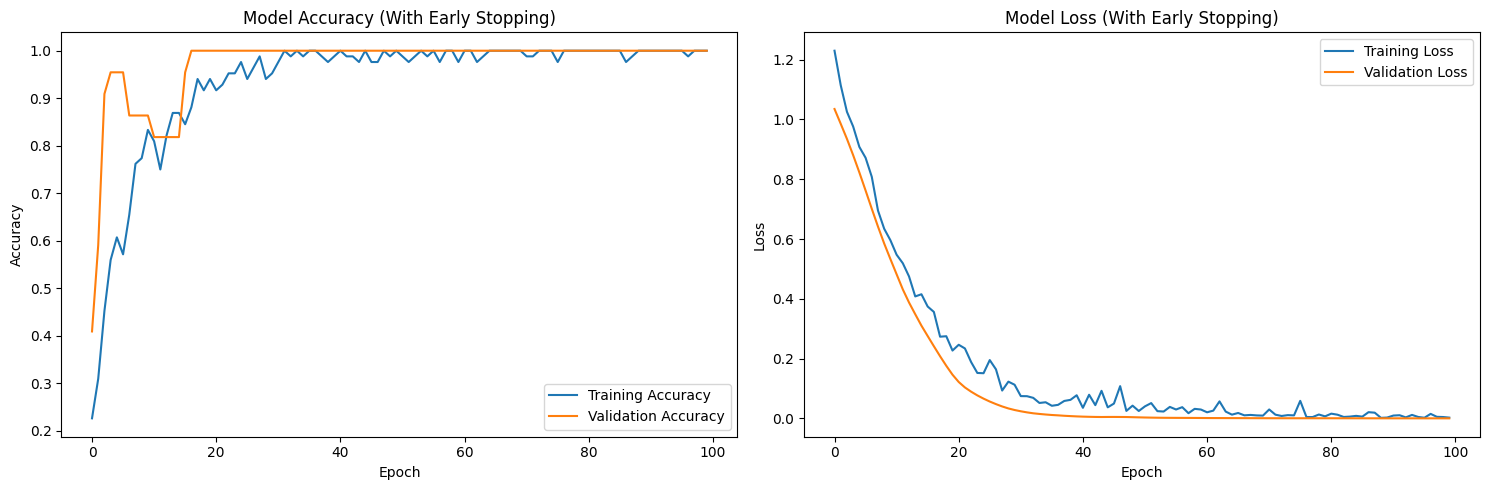


Test Accuracy: 0.8913
Test Loss: 0.7757
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Classification Report:
              precision    recall  f1-score   support

        High       0.89      1.00      0.94        16
         Low       1.00      0.71      0.83        14
      Medium       0.83      0.94      0.88        16

    accuracy                           0.89        46
   macro avg       0.91      0.88      0.89        46
weighted avg       0.90      0.89      0.89        46



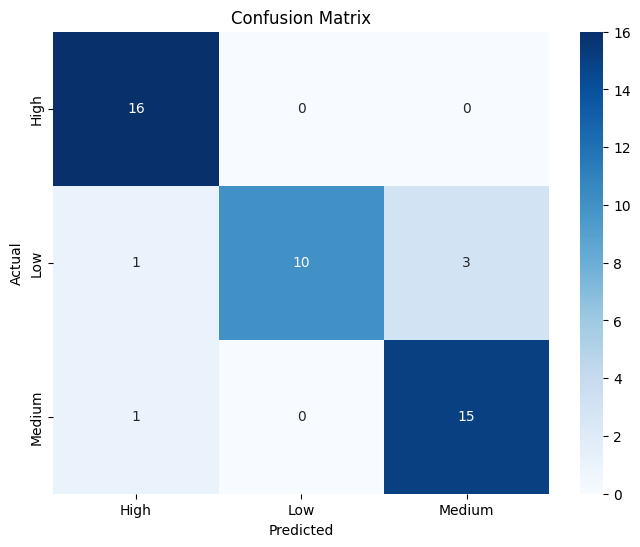

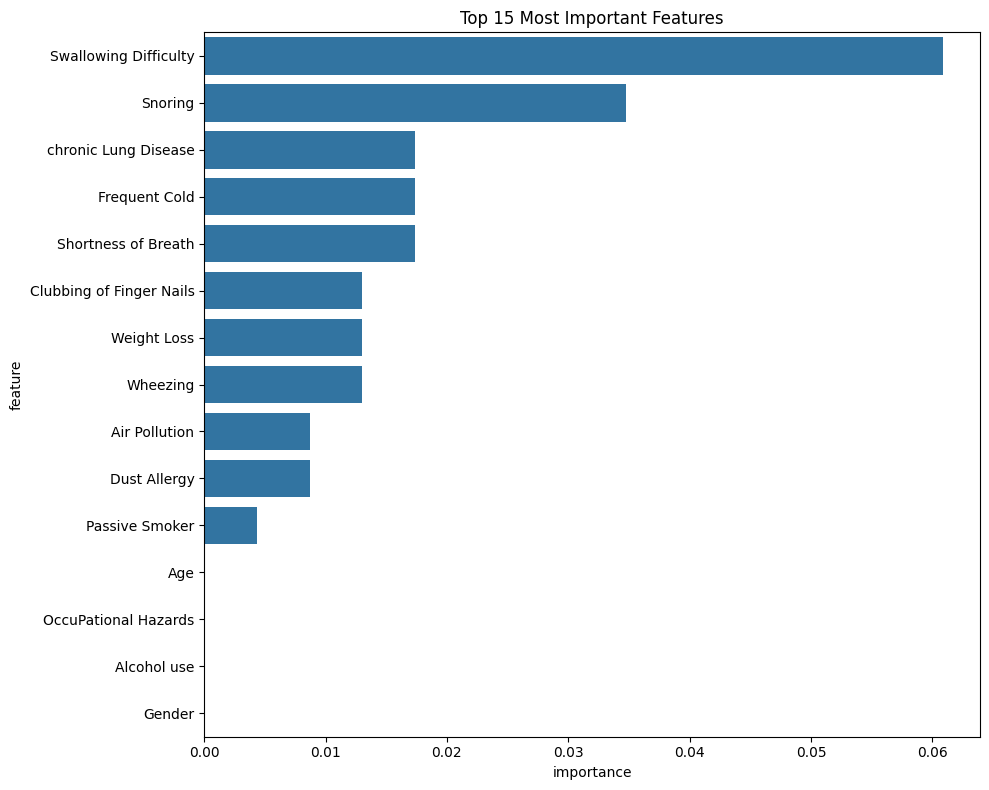

Improved model saved successfully!

Example Prediction:
Actual Level: High
Predicted Level: High
Confidence: 1.0000

IMPROVED MODEL TRAINING SUMMARY
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Test Accuracy: 0.8913
Number of Epochs Used: 100
Training Samples: 106
Testing Samples: 46
Number of Features: 23
Early Stopping: Enabled (patience=20)
Learning Rate Scheduling: Enabled

Comparison with Random Forest:
Neural Network Accuracy: 0.8913
Random Forest Accuracy: 0.8913
Random Forest CV Accuracy: 0.9714 (+/- 0.0762)


In [2]:
# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Step 3: Load and explore the data
from google.colab import files
uploaded = files.upload()

# Read the dataset
df = pd.read_csv('cancer patient data sets.csv')

# Basic exploration
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget variable distribution:")
print(df['Level'].value_counts())

# Step 4: Data Preprocessing - IMPROVED VERSION
# Remove unnecessary columns
columns_to_drop = ['index', 'Patient Id']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# QUICK IMPROVEMENT 1: Address duplicate data issue properly
print(f"\nBefore removing duplicates: {df_cleaned.shape[0]}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"After removing duplicates: {df_cleaned.shape[0]}")

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned['Level_encoded'] = label_encoder.fit_transform(df_cleaned['Level'])

print("Original levels:", df_cleaned['Level'].unique())
print("Encoded levels:", df_cleaned['Level_encoded'].unique())

# Step 5: Prepare features and target
X = df_cleaned.drop(['Level', 'Level_encoded'], axis=1)
y = df_cleaned['Level_encoded']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Step 6: Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Build the Neural Network Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')  # 3 output classes: Low, Medium, High
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# QUICK IMPROVEMENT 2: Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# QUICK IMPROVEMENT 3: Add learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001,
    verbose=1
)

# Step 9: Train the model with epochs - IMPROVED VERSION
print("\nStarting training with early stopping and learning rate scheduling...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],  # ADDED CALLBACKS
    verbose=1
)

print(f"Training stopped at epoch {len(history.history['loss'])}")

# Step 10: Evaluate the model
# Training history visualization
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (With Early Stopping)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (With Early Stopping)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 11: Model evaluation on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 12: Detailed performance analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes,
                          target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 13: Feature Importance Analysis (Optional)
try:
    from sklearn.inspection import permutation_importance

    # Define a scoring function for the Keras model
    def keras_accuracy_scorer(estimator, X, y_true):
        y_pred = np.argmax(estimator.predict(X, verbose=0), axis=1)
        return accuracy_score(y_true, y_pred)

    # Calculate permutation importance
    perm_importance = permutation_importance(
        model, X_test_scaled, y_test, n_repeats=5, random_state=42, scoring=keras_accuracy_scorer
    )

    # Create feature importance dataframe
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False)

    # Plot top 15 most important features
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Feature importance analysis skipped: {e}")

# Step 14: Save the model
model.save('lung_cancer_detection_model_improved.h5')
print("Improved model saved successfully!")

# Step 15: Example prediction function
def predict_lung_cancer_risk(new_data):
    """
    Predict lung cancer risk level for new data
    """
    # Preprocess new data
    new_data_scaled = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(new_data_scaled, verbose=0)
    predicted_class = np.argmax(prediction, axis=1)
    confidence = np.max(prediction, axis=1)

    # Convert back to original labels
    predicted_label = label_encoder.inverse_transform(predicted_class)

    return predicted_label[0], confidence[0]

# Example usage with test data
print("\nExample Prediction:")
sample_data = X_test.iloc[0:1]  # Take first test sample
predicted_level, confidence = predict_lung_cancer_risk(sample_data)
actual_level = label_encoder.inverse_transform([y_test.iloc[0]])

print(f"Actual Level: {actual_level[0]}")
print(f"Predicted Level: {predicted_level}")
print(f"Confidence: {confidence:.4f}")

# Step 16: Summary of key metrics - IMPROVED VERSION
print("\n" + "="*50)
print("IMPROVED MODEL TRAINING SUMMARY")
print("="*50)
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Number of Epochs Used: {len(history.history['accuracy'])}")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print(f"Number of Features: {X_train.shape[1]}")
print(f"Early Stopping: Enabled (patience=20)")
print(f"Learning Rate Scheduling: Enabled")

# QUICK IMPROVEMENT 4: Compare with baseline model
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest for comparison
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_accuracy = rf_model.score(X_test_scaled, y_test)

print(f"\nComparison with Random Forest:")
print(f"Neural Network Accuracy: {test_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# QUICK IMPROVEMENT 5: Cross-validation score (optional)
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")